## Numerical data - Find the bad part of the dataset

This colab programming exercise is part of the Machine Learning Crash Course module [Working with numerical data](https://developers.google.com/machine-learning/crash-course/numerical-data). It is the final of two Colabs focused on data.

### What to expect

In the section, [First steps with numerical data](https://developers.google.com/machine-learning/crash-course/numerical-data/first-steps), you learned how to do the following:

- Visualize your data in plots or graphs.
- Evaluate potential features and labels mathematically.
- Find [**outliers**](https://developers.google.com/machine-learning/glossary/#outliers).

Thie exercise guides you through visual and mathematical ways to find hidden _bad_ values in a dataset. You'll use scatter plots and basic statistics to locate unreliable values in the dataset.

### The Dataset

The dataset for this exercise is fictitious. It contains 1,400 rows. Each row contains the following two columns:

- **calories**, which is the number of breakfast calories as determined by a nutritionist.
- **test_score**, which is the student's score on a math test. A reliable program determines the value of `test_score`.

The data pool consists of 50 students, each evaluated on 28 consecutive days. So, rows 0-49 show how each of the students performed on the first day, rows 50-99 show how each of the students performed on the second day, and so on.

The dataset aims to determine the relationship between the number of calories a student ate for breakfast and their test scores. However, your goal is simply to determine whether some values in the dataset are bad.


##### Setup - Install relevant modules


In [1]:
%pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


##### Setup - Import relevant modules


In [4]:
# The following code imports relevant modules that enable you to run the Colab.
# If you encounter technical issues running some of the code sections that follow, try running this section again.

import io
import pandas as pd
from matplotlib import pyplot as plt


# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

##### Setup - Define the dataset


In [3]:
# The following code defines the dataset that you'll use in the Colab.
# If you encounter technical issues running some of the code sections that follow, try running this section again.

dataset = """calories,test_score
201,76
142,72
397,84
294,79
334,76
173,60
117,59
174,60
333,80
383,83
77,59
39,62
242,73
7,51
140,63
73,66
102,61
5,48
339,88
388,92
374,86
358,81
292,76
167,70
300,80
348,77
68,49
1,55
198,63
154,74
220,75
9,58
129,56
108,55
356,81
383,96
299,86
107,62
117,67
103,54
110,56
80,57
125,57
132,71
176,73
390,98
199,63
5,56
99,56
39,49
251,67
71,57
7,52
28,49
139,61
227,77
268,82
113,70
32,57
1,51
217,64
248,67
76,60
388,90
9,43
315,86
49,47
97,53
251,72
224,65
299,75
325,81
45,47
203,67
326,83
329,82
282,79
203,61
117,63
218,68
262,75
73,64
205,69
54,51
296,83
132,63
16,45
363,80
138,62
181,64
13,49
294,86
374,85
338,79
375,87
260,80
375,93
234,74
103,64
322,75
210,64
280,79
110,65
329,87
94,55
399,88
264,81
88,61
34,48
373,81
268,80
333,87
208,71
109,68
142,57
39,63
84,66
263,78
247,74
172,74
303,79
92,60
107,62
49,54
293,73
238,72
341,85
48,54
25,52
189,69
230,74
206,78
190,63
237,68
305,72
22,55
223,70
62,62
25,50
115,67
220,81
123,62
210,72
39,57
13,53
88,63
56,62
285,83
50,51
369,94
174,60
206,63
236,77
370,90
66,53
178,72
167,71
133,71
157,64
298,78
1,58
99,55
324,91
389,97
107,68
371,93
36,55
365,90
131,71
132,63
149,70
126,68
254,78
294,71
75,57
224,67
221,78
219,71
307,81
205,64
209,70
382,90
396,98
118,60
367,89
367,83
203,65
33,49
395,97
154,60
205,79
188,63
345,76
258,80
258,70
353,79
282,86
356,91
367,81
91,67
183,82
47,58
118,72
157,83
70,58
172,93
45,58
28,50
92,74
187,80
10,60
76,70
174,81
111,79
91,75
168,83
29,48
181,90
122,80
63,71
193,85
186,82
145,71
77,62
193,87
100,61
71,71
154,78
52,59
46,65
66,55
62,62
51,57
41,67
24,57
186,80
4,59
77,70
29,63
28,49
61,65
26,58
127,83
199,97
68,61
145,84
102,62
50,67
93,70
169,85
119,67
312,78
341,78
67,66
17,48
45,52
24,48
47,58
102,55
280,82
220,73
192,61
269,83
373,81
160,71
290,84
264,76
48,55
269,75
204,76
282,80
112,68
390,87
270,74
247,72
16,46
363,89
133,65
185,64
331,92
16,53
310,87
66,48
128,71
160,72
308,76
225,64
34,56
222,77
392,85
97,53
222,68
302,87
378,85
61,61
161,63
129,57
43,54
116,62
173,71
189,65
361,80
187,77
314,73
341,91
165,59
44,63
184,75
341,82
119,55
70,63
165,68
394,92
80,54
65,61
29,55
64,65
310,83
384,91
304,88
216,66
6,53
55,57
249,84
395,81
41,50
334,86
394,97
100,56
125,61
14,49
61,53
143,72
373,86
238,77
138,59
388,88
357,79
20,54
82,52
261,75
210,73
15,52
210,69
364,92
365,95
132,55
143,68
40,50
88,64
35,55
18,44
56,47
109,55
268,78
178,67
399,82
11,45
235,74
215,73
200,69
220,78
249,82
250,79
121,68
210,71
165,70
265,79
290,87
384,88
207,69
16,54
193,62
307,75
292,76
312,78
345,83
67,56
180,75
126,69
299,86
143,60
251,66
371,86
25,59
27,56
159,59
125,69
114,56
66,50
240,82
184,68
196,74
21,44
254,73
364,86
127,59
347,93
157,71
161,65
315,83
57,50
276,79
69,49
300,79
83,56
199,75
367,95
247,83
15,49
136,72
341,87
129,67
284,82
248,70
68,55
320,81
280,80
36,62
272,85
171,76
161,74
307,77
365,84
159,58
299,86
45,58
244,73
215,68
60,50
259,75
269,76
382,88
61,48
185,74
40,61
373,87
326,86
373,93
77,55
358,94
70,48
303,87
220,68
85,64
224,81
94,55
167,63
329,86
137,60
246,76
112,62
22,47
99,53
58,55
170,61
196,73
105,58
241,80
259,84
248,71
357,92
262,75
105,60
37,58
347,88
106,54
102,57
184,70
166,68
63,64
301,85
306,72
44,52
331,90
159,67
72,53
208,77
284,83
168,74
198,66
291,84
218,80
74,49
279,82
244,83
263,74
287,79
194,77
359,84
364,85
391,82
278,78
13,51
111,60
169,72
339,78
213,69
95,65
159,58
214,64
3,47
234,77
332,75
308,87
196,73
95,59
350,77
29,60
220,69
187,77
50,52
91,64
326,82
236,70
247,70
174,70
213,63
184,68
79,53
121,67
363,89
149,72
275,77
320,77
319,80
128,54
319,83
361,88
49,57
374,92
333,83
188,68
242,82
376,93
107,58
282,72
0,42
26,58
209,79
58,55
182,68
227,68
48,54
347,82
28,60
79,49
155,69
193,78
282,77
180,95
176,87
51,69
137,76
158,78
102,62
170,92
101,69
44,63
199,84
39,50
43,59
15,57
55,64
162,91
39,61
12,45
84,64
13,48
171,93
127,73
1,50
66,65
2,53
92,60
193,91
36,51
31,54
199,90
5,56
103,65
124,76
80,58
0,49
51,67
108,81
66,66
96,72
54,61
85,71
122,72
99,75
135,82
30,59
58,56
116,81
78,60
119,79
47,63
74,66
224,64
237,81
267,71
262,68
314,76
354,84
232,71
72,55
98,57
55,56
244,78
222,65
364,80
4,46
342,82
341,85
200,71
208,65
339,80
128,65
189,64
10,45
278,74
208,79
257,79
232,69
148,58
146,61
158,64
215,69
344,84
352,85
65,55
254,67
273,85
256,71
107,66
169,75
34,61
360,90
282,78
36,46
289,80
186,62
18,45
190,60
244,74
191,74
389,82
355,90
70,57
10,52
120,61
204,70
199,70
131,58
399,88
111,67
36,60
22,46
385,91
59,57
41,56
181,60
338,81
335,77
390,97
271,75
167,63
349,76
325,77
90,67
292,81
298,86
185,74
25,51
218,69
42,57
377,91
332,90
1,53
9,43
298,85
186,63
40,51
74,49
259,76
375,87
51,60
165,70
280,78
92,55
316,79
358,92
43,58
294,74
199,76
121,57
311,88
205,79
87,64
3,59
128,55
183,69
339,91
101,63
181,68
361,83
371,94
76,49
252,67
102,55
1,53
234,80
217,64
351,92
360,95
336,81
19,50
353,76
154,59
263,84
249,76
118,65
187,70
277,72
293,71
220,76
289,72
250,71
136,66
96,55
284,73
270,82
238,75
347,77
322,83
13,50
79,57
33,58
11,58
34,58
376,90
242,79
351,82
57,51
22,50
226,77
228,68
253,71
363,86
144,68
55,55
98,59
373,86
85,51
128,61
332,81
59,57
55,47
351,81
96,51
309,88
323,80
105,59
290,73
377,82
352,80
276,71
251,77
224,81
277,86
141,66
143,64
111,63
253,71
354,94
122,67
358,79
86,52
222,80
130,65
53,52
318,88
219,72
221,67
191,66
82,64
35,57
176,65
110,53
252,71
21,60
12,43
63,52
85,64
118,64
215,70
27,52
142,66
387,80
334,82
147,56
154,67
285,84
371,80
358,89
144,56
283,76
44,61
298,79
318,74
74,54
229,68
308,89
391,95
377,93
117,60
385,92
391,94
244,66
350,87
272,72
268,77
293,86
188,68
171,63
250,79
239,68
389,88
92,67
129,57
348,89
278,84
160,69
245,66
275,77
249,74
332,81
388,90
158,65
60,62
325,87
216,72
31,55
397,86
271,76
192,70
59,50
195,72
383,81
267,81
279,76
135,64
362,85
37,50
384,84
49,60
49,60
115,56
199,68
203,65
326,75
333,92
153,62
248,72
212,69
38,49
361,87
302,86
381,94
43,62
79,55
274,74
44,47
252,79
188,62
357,84
94,65
143,66
60,49
26,56
193,65
363,84
322,87
120,67
248,73
312,89
298,81
142,73
261,85
272,72
49,58
249,74
204,79
34,58
69,53
180,71
210,70
59,53
47,58
39,66
192,97
177,91
109,69
177,82
67,66
107,71
70,58
185,93
49,53
126,74
96,64
37,48
152,79
67,72
177,86
13,61
123,67
154,75
81,69
93,73
66,72
61,67
53,58
152,81
112,72
8,43
159,77
9,53
133,76
110,75
25,59
144,83
155,81
1,45
50,60
6,55
116,70
117,82
135,74
93,64
190,90
55,65
189,85
60,64
183,95
75,57
135,70
156,80
276,83
298,72
146,70
339,76
46,53
0,55
355,87
53,61
75,56
233,67
336,92
342,89
378,85
319,84
216,75
72,52
232,81
156,74
281,75
398,95
312,90
285,83
228,79
288,85
145,61
0,45
159,74
383,85
121,69
28,59
263,72
72,52
70,60
73,64
9,47
320,87
155,66
273,70
187,67
372,93
324,74
13,46
1,43
263,73
28,57
102,64
390,88
386,82
45,50
10,44
216,79
17,59
221,78
398,81
95,51
340,78
29,62
145,57
80,49
196,65
299,86
42,60
158,58
392,89
130,56
299,88
18,59
4,52
337,77
290,73
58,59
136,59
270,83
161,75
376,97
100,65
341,83
250,70
213,73
344,93
287,83
18,58
290,71
229,76
66,53
344,81
392,84
254,80
4,44
298,72
58,49
342,77
227,72
184,63
33,52
112,69
101,57
310,74
152,64
303,83
301,82
385,95
370,91
285,70
341,85
41,47
311,89
127,62
174,74
264,79
125,70
213,74
148,63
303,87
392,91
205,77
139,65
273,73
116,62
169,60
71,58
141,72
236,77
163,58
221,66
303,89
89,57
258,77
326,83
181,73
97,68
255,77
218,71
345,93
16,48
77,53
368,88
69,57
129,66
257,82
346,83
383,81
320,84
315,86
89,54
252,75
124,60
65,65
365,78
363,94
168,60
112,60
259,75
384,97
100,64
382,81
87,66
124,54
249,68
341,92
134,65
210,76
386,92
287,87
328,85
376,85
333,78
319,82
313,88
223,66
230,75
103,66
256,79
368,84
309,88
129,58
187,75
388,89
257,79
210,70
168,66
325,78
318,84
336,87
233,73
374,81
93,56
23,59
390,82
97,64
385,92
386,89
209,63
30,49
335,85
295,77
70,58
247,67
107,62
347,91
72,63
46,53
41,48
114,54
145,67
373,86
124,53
387,97
18,46
85,67
344,93
142,56
243,67
87,65
258,70
290,87
399,96
137,58
48,59
157,67
148,64
9,56
175,60
290,81
100,52
233,66
41,46
100,64
49,56
235,80
308,79
322,89
148,60
33,55
397,91
75,57
6,47
102,59
166,75
60,59
54,62
352,80
353,79
380,81
283,81
395,91
69,64
184,69
64,59
98,56
92,60
291,75
343,93
322,78
29,45
17,46
362,78
179,73
64,56
4,59
59,49
267,73
4,44
388,85
311,78
257,69
346,82
188,73
185,66
41,55
179,63
340,81
112,58
99,61
364,82
253,67
145,61
195,69
214,73
346,81
356,86
215,78
394,81
277,77
199,75
35,62
62,64
161,65
138,68
37,49
6,55
169,67
10,58
30,56
190,61
36,53
221,74
134,66
297,73
36,49
8,48
58,56
45,63
148,83
90,74
187,89
111,70
33,60
75,62
71,73
79,65
87,59
36,64
139,85
3,58
32,50
58,63
72,65
50,53
39,63
7,47
97,71
120,77
78,58
22,59
9,52
60,64
132,76
93,68
102,72
72,68
151,83
46,54
56,63
85,69
100,69
186,96
11,55
150,81
144,85
82,71
93,72
71,57
59,70
118,79
126,67
117,73
164,90
142,73
102,64
359,77
240,80
42,59
186,75
170,61
327,89
382,86
216,70
249,81
139,61
258,68
153,62
230,70
104,59
207,76
212,72
354,81
139,57
43,60
24,53
0,57
146,57
150,56
192,78
383,96
127,67
52,61
20,56
47,51
39,58
75,62
106,53
31,55
112,57
214,68
330,84
130,59
282,82
167,63
279,76
136,57
35,53
373,81
69,51
179,66
361,89
88,55
327,79
398,83
237,76
175,68
112,68
372,96
229,70
112,57
331,85
157,73
36,52
64,54
237,78
343,86
141,56
394,85
151,58
193,62
289,70
285,70
359,90
395,89
38,52
339,75
41,51
378,82
313,76
269,77
372,88
34,51
243,67
310,74
62,52
113,70
113,70
394,84
297,72
303,88
182,70
34,54
24,46
343,90
141,67
129,59
67,57
312,88
276,79
35,62
324,80
375,82
189,76
195,66
44,50
"""

##### Load the dataset into a DataFrame

The following code cell loads the dataset into a DataFrame named `training_df`.


In [5]:
training_df = pd.read_csv(io.StringIO(dataset), on_bad_lines="warn")

##### Task 1: Examine basic statistics

The followign line of code generates basic statistics on the dataset:


In [6]:
training_df.describe()

,calories,test_score
count,1400.0,1400.0
mean,185.4,69.9
std,116.9,12.8
min,0.0,42.0
25%,80.0,59.0
50%,177.0,70.0
75%,285.0,80.0
max,399.0,98.0


Do the basic statistics imply outliers?


##### Task 1: Solution (run this code block to view)


In [9]:
print(
    """The basic statistics do not suggest a lot of outliers.
The standard deviations are substantially less than the means. Furthermore, the quartile boundaries are approximately evenly spaced."""
)

The basic statistics do not suggest a lot of outliers.
The standard deviations are substantially less than the means. Furthermore, the quartile boundaries are approximately evenly spaced.


### Define plotting functions

The following code cell uses [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following functions:

- `plot_the_dataset`, which creates a scatter plot of random points in the dataset. Setting the `number_of_points_to_plot` to 1,400 causes the function to create a scatter plot of all 1,400 points in the dataset.
- `plot_a_contiguous_portion_of_dataset`, which creates a scatter plot of all the points in the dataset from start to end. For example, setting `start` to 0 and `end` to 100 will produce a scatter plot of the first 100 points in the dataset.

You may optionally double-click the headline to see the matplotlib code.


##### Define the plotting functions


In [8]:
# The following code defines the plotting functions that can be used to visualize the data.


def plot_the_dataset(feature, label, number_of_points_to_plot):
    """Plot N random points of the dataset."""

    # Label the axes.
    plt.xlabel(feature)
    plt.ylabel(label)

    # Create a scatter plot from n random points of the dataset.
    random_examples = training_df.sample(n=number_of_points_to_plot)
    plt.scatter(random_examples[feature], random_examples[label])

    # Render the scatter plot.
    plt.show()


def plot_a_contiguous_portion_of_dataset(feature, label, start, end):
    """Plot the data points from start to end."""

    # Label the axes.
    plt.xlabel(feature + "Day")
    plt.ylabel(label)

    # Create a scatter plot.
    plt.scatter(training_df[feature][start:end], training_df[label][start:end])

    # Render the scatter plot.
    plt.show()


print(
    """Defined the following functions:
  * plot_the_dataset
  * plot_a_contigguous_portion_of_dataset"""
)

Defined the following functions:
  * plot_the_dataset
  * plot_a_contigguous_portion_of_dataset


##### Task 2: Visualize the dataset

Outliers might still be lurking in the dataset. Visualizing the dataset with a scatter plot might identify outliers hidden in basic statistics.


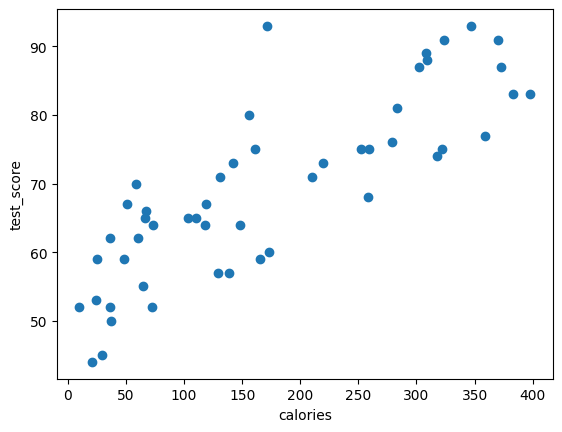

In [10]:
plot_the_dataset("calories", "test_score", number_of_points_to_plot=50)

Does the scatter plot of 50 random data points suggest outliers? What happens if you increase the `number_of_points_to_plot`?


##### Task 2: Solution (run this code block to view)


In [11]:
print(
    """Visualizing 50 data points doesn't imply any outliers.
However, as you increase the number of random data points to plot, a clump of outliers appears. Notice the points with high test scores but less than 200 calories."""
)

Visualizing 50 data points doesn't imply any outliers.
However, as you increase the number of random data points to plot, a clump of outliers appears. Notice the points with high test scores but less than 200 calories.


##### Task 3: Get statistics for each week

Possibly, different experimenters encoded `calories` differently. For example, maybe the experiemnt involved a different encoder for week 0 than week 1? Run the following code cells to get statistics fro each week. Can you see significant differences for each week?


In [12]:
# Get statistics on Week 0
training_df[0:350].describe()

,calories,test_score
count,350.0,350.0
mean,181.3,69.7
std,117.5,12.8
min,1.0,43.0
25%,77.0,60.0
50%,172.0,70.0
75%,281.5,80.0
max,399.0,98.0


In [13]:
# Get statistics on Week 1
training_df[350:700].describe()

,calories,test_score
count,350.0,350.0
mean,184.4,69.8
std,112.4,12.8
min,0.0,42.0
25%,83.2,59.2
50%,185.0,70.0
75%,278.0,80.0
max,399.0,97.0


In [14]:
# Get statistics on Week 2
training_df[700:1050].describe()

,calories,test_score
count,350.0,350.0
mean,189.9,70.3
std,118.1,12.9
min,0.0,43.0
25%,82.8,60.0
50%,184.5,71.0
75%,289.8,81.0
max,398.0,97.0


In [15]:
# Get statistics on Week 3
training_df[1050:1400].describe()

,calories,test_score
count,350.0,350.0
mean,186.2,69.8
std,120.0,12.7
min,0.0,44.0
25%,82.8,59.0
50%,166.5,69.0
75%,297.0,80.0
max,399.0,97.0


##### Task 3: Solution (run this code block to view)


In [16]:
print(
    """The basic statistics for each week are pretty similar, so weekly differences aren't a likely explanation for the outliers."""
)

The basic statistics for each week are pretty similar, so weekly differences aren't a likely explanation for the outliers.


##### Task 4: Visualize by day of week

Weekly values didn't change, but perhaps different experimenters were hired for different days of the week? Maybe the Monday experimenter encoded values differently than the Tuesday experimenter?

The following code cell generates seven scatter plots-one for each day of the first week. Was each day of the week the same?



Day 0


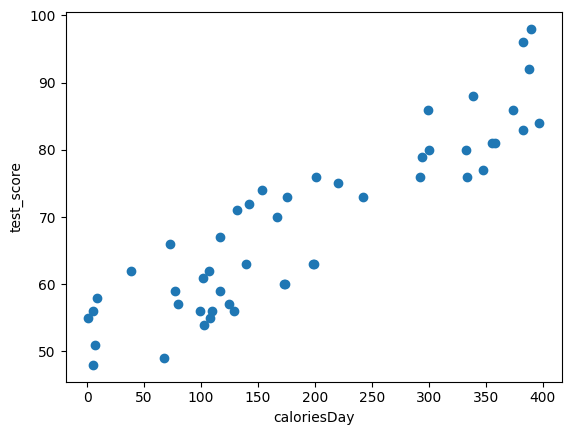


Day 1


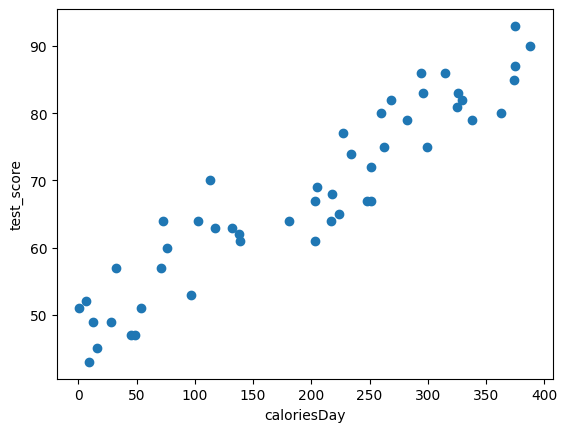


Day 2


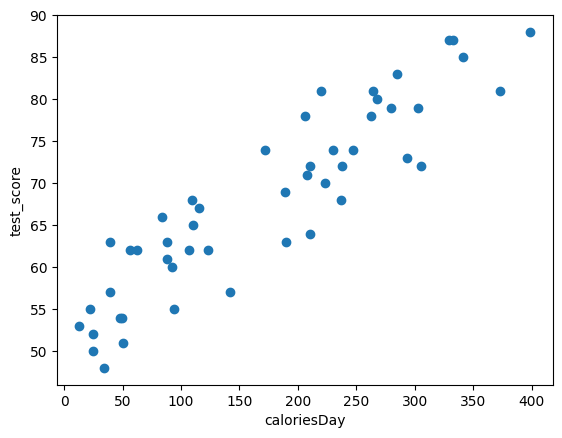


Day 3


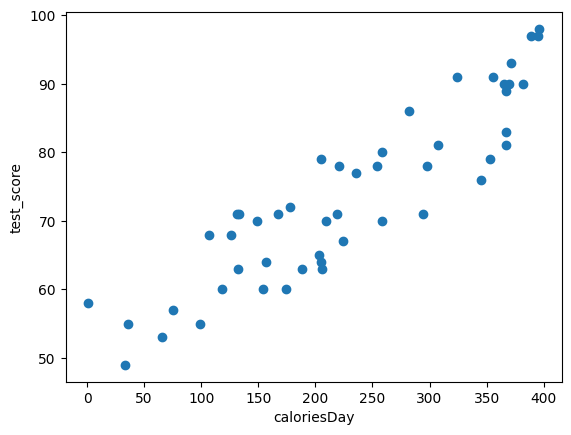


Day 4


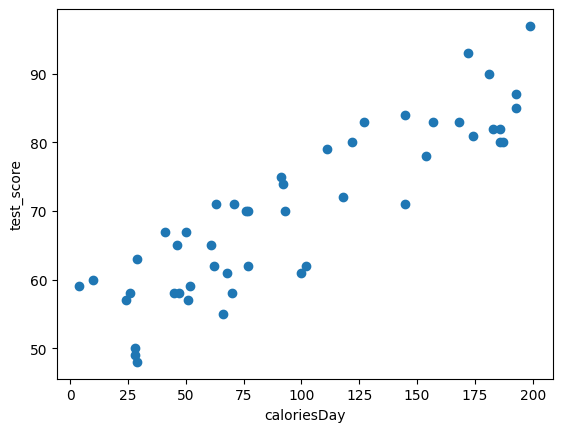


Day 5


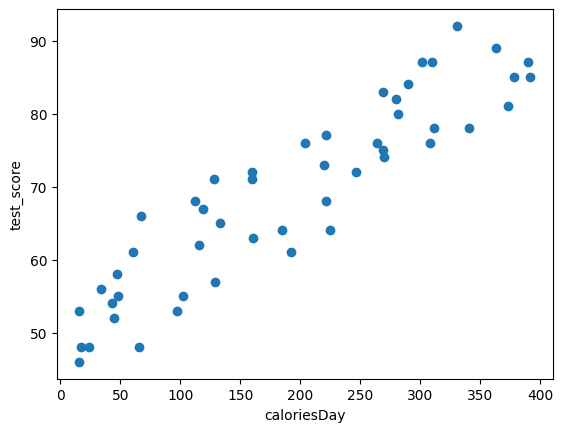


Day 6


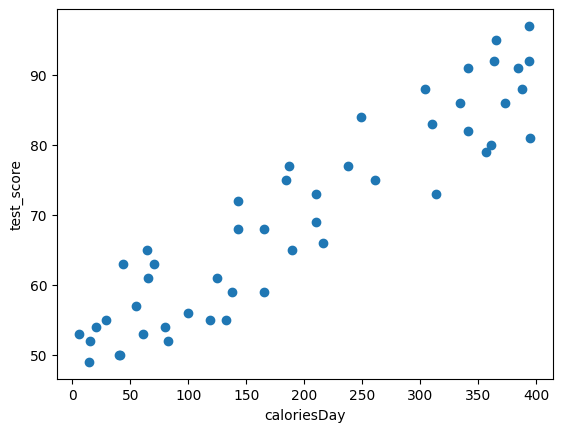

In [18]:
for i in range(0, 7):
    start = i * 50
    end = start + 49
    print(f"\nDay {i}")
    plot_a_contiguous_portion_of_dataset("calories", "test_score", start, end)

##### Task 4: Solution (run this code block to view)


In [19]:
print(
    """Wait a second--the calories value for Day 4 spans 0 to 200, while the calories value for all the other Days spans 0 to 400. Something is wrong with Day 4, at least on the first week."""
)

Wait a second--the calories value for Day 4 spans 0 to 200, while the calories value for all the other Days spans 0 to 400. Something is wrong with Day 4, at least on the first week.


##### Task 5: Use statistics to confirm your suspicions

You suspect Day 4 (Thursday) is encoded differently than other days of week. Write some code in the following code cell to confirm your suspicions.


In [20]:
# You cuold use a variety of metrics to fully compare Thursday to the other six days, but this answer simply focuses on the mean.

running_total_of_thursday_calories = 0
running_total_of_non_thursday_calories = 0
count = 0
for week in range(0, 4):
    for day in range(0, 7):
        for subject in range(0, 50):
            position = week * 350 + day * 50 + subject
            if day == 4:  # Thursday
                running_total_of_thursday_calories += training_df["calories"][position]
            else:  # Any day except Thursday
                count += 1
                running_total_of_non_thursday_calories += training_df["calories"][
                    position
                ]

mean_of_thursday_calories = running_total_of_thursday_calories / 200
mean_of_non_thursday_calories = running_total_of_non_thursday_calories / 1200

print(f"The mean of Thursday calories is {mean_of_thursday_calories:.0f}")
print(
    f"The mean of calories on days other than Thursday is {mean_of_non_thursday_calories:.0f}"
)

The mean of Thursday calories is 93
The mean of calories on days other than Thursday is 201
